In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
#from kaggle.competitions import nflrush
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
import re
import keras
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.isotonic import IsotonicRegression
tqdm.pandas()

from numba import jit

ModuleNotFoundError: No module named 'numba'

In [2]:
from kaggle.competitions import nflrush

ModuleNotFoundError: No module named 'kaggle'

In [3]:
import random as rn
import tensorflow as tf
import numpy as np
from keras import backend as K

def init_seeds(seed):

    # The below is necessary for starting Numpy generated random numbers
    # in a well-defined initial state.

    np.random.seed(seed)

    # The below is necessary for starting core Python generated random numbers
    # in a well-defined state.

    rn.seed(seed)

    # The below tf.set_random_seed() will make random number generation
    # in the TensorFlow backend have a well-defined initial state.
    # For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

    tf.set_random_seed(seed)

    sess = tf.Session(graph=tf.get_default_graph())
    K.set_session(sess)
    return sess

In [4]:
input_folder = 'data/'
train = pd.read_csv(os.path.join(input_folder, 'train.csv'), dtype={'WindSpeed': 'object'})
train.shape

(682154, 49)

In [5]:
train.shape

(682154, 49)

In [10]:
train.ToLeft

AttributeError: 'DataFrame' object has no attribute 'ToLeft'

In [ ]:
train.loc[train.ToLeft, 'Y_std'] = 160/3 - train.loc[train.ToLeft, 'Y'] 

In [6]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 100)
train.sort_values(by=['GameId', 'PlayId', ])head(100)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
5,2017090700,20170907000118,away,75.06,24.00,1.01,0.32,0.18,308.34,95.01,2543494,Dee Ford,55,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-2,252,03/19/1991,Auburn,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
6,2017090700,20170907000118,away,74.11,16.64,1.11,0.83,0.02,357.23,322.59,2543637,Terrance Mitchell,39,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,5-11,190,05/17/1992,Oregon,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
7,2017090700,20170907000118,away,73.37,18.73,1.24,0.74,0.13,328.52,270.04,2543851,Phillip Gaines,23,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,193,04/04/1991,Rice,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
8,2017090700,20170907000118,away,56.63,26.90,0.26,1.86,0.28,344.70,55.31,2550257,Daniel Sorensen,49,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-2,208,03/05/1990,Brigham Young,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
9,2017090700,20170907000118,away,73.35,38.83,4.55,0.76,0.51,75.47,190.84,2552488,Marcus Peters,22,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB

In [10]:
# Columns to be used in the model

In [11]:
player_cols = ['X', 'Y', 'X_dir', 'Y_dir', 'X_S', 'Y_S', 'S', 'A', 'IsRusher', 'IsOnOffense']
play_cols = ['X_rusher', 'Y_rusher', 'YardLine_std']

We clean and standardize data. I also include some data cleaning that was shared by top teams, namely using S = 10 * Dis, and averaging A in 2017.

In [15]:
train.VisitorTeamAbbr.unique()

array(['KC', 'NYJ', 'ATL', 'BAL', 'PIT', 'ARI', 'JAX', 'OAK', 'PHI',
       'IND', 'SEA', 'CAR', 'NYG', 'NO', 'LAC', 'HOU', 'CLE', 'BUF',
       'TEN', 'NE', 'MIN', 'CHI', 'MIA', 'DAL', 'WAS', 'SF', 'GB', 'DET',
       'LA', 'DEN', 'TB', 'CIN'], dtype=object)

In [14]:
train.loc[train.VisitorTeamAbbr == "ARI", :]

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
5060,2017091004,20170910040097,away,82.41,29.93,0.91,0.57,0.07,273.07,250.98,71461,A.Q. Shipley,53,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-1,307,05/22/1986,Penn State,C,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5061,2017091004,20170910040097,away,82.96,28.36,0.74,0.22,0.11,172.26,289.76,497016,Mike Iupati,76,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-5,331,05/12/1987,Idaho,OG,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5062,2017091004,20170910040097,away,83.60,33.76,0.99,1.54,0.24,187.09,247.15,497061,Jared Veldheer,68,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-8,321,06/14/1987,Hillsdale,T,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5063,2017091004,20170910040097,away,83.66,24.45,1.12,2.35,0.12,198.19,336.74,497238,Jermaine Gresham,84,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-5,260,06/16/1988,Oklahoma,TE,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5064,2017091004,20170910040097,away,87.40,29.61,3.60,1.66,0.38,19.96,96.33,2505245,Carson Palmer,3,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-5,235,12/27/1979,USC,QB,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5065,2017091004,20170910040097,away,83.02,22.65,2.13,1.32,0.27,162.40,267.23,2506106,Larry Fitzgerald,11,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-3,218,08/31/1983,Pittsburgh,WR,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5066,2017091004,20170910040097,away,82.38,20.34,2.85,1.20,0.53,171.27,285.22,2541966,Jaron Brown,13,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-3,205,01/08/1990,Clemson,WR,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5067,2017091004,20170910040097,away,81.63,38.27,2.90,2.87,0.35,133.51,233.28,2543847,John Brown,12,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,5-11,179,04/03/1990,Pittsburg State,WR,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5068,2017091004,20170910040097,away,82.97,27.53,1.13,0.41,0.10,211.68,294.04,2552626,D.J. Humphries,74,2017,27,1,14:16:00,ARZ,2,6,ARZ,0,0,2553435,SINGLEBACK,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",left,2017-09-10T17:05:15.000Z,2017-09-10T17:05:14.000Z,2,6-5,307,12/28/1993,Florida,OT,DET,ARI,1,Ford Field,"Detroit, MI",Indoors,Field Turf,Controlled Climate,68.0,70.0,NaN,NaN
5069,2017091004,20170910040097,away,87.10,28.66,3.65,2.23,0.43,169.85,257.64,2553435,David Johnson,

In [11]:
pd.set_option('max_rows', 200)

In [12]:
def reorient(train, flip_left):
    # Create dummy variable for playDirection
    train['ToLeft'] = train.PlayDirection == "left"
    #train['IsBallCarrier'] = train.NflId == train.NflIdRusher

    # Changing some team names 
    train.loc[train.VisitorTeamAbbr == "ARI", 'VisitorTeamAbbr'] = "ARZ"
    train.loc[train.HomeTeamAbbr == "ARI", 'HomeTeamAbbr'] = "ARZ"
    
    train.loc[train.VisitorTeamAbbr == "BAL", 'VisitorTeamAbbr'] = "BLT"
    train.loc[train.HomeTeamAbbr == "BAL", 'HomeTeamAbbr'] = "BLT"
    
    train.loc[train.VisitorTeamAbbr == "CLE", 'VisitorTeamAbbr'] = "CLV"
    train.loc[train.HomeTeamAbbr == "CLE", 'HomeTeamAbbr'] = "CLV"
    
    train.loc[train.VisitorTeamAbbr == "HOU", 'VisitorTeamAbbr'] = "HST"
    train.loc[train.HomeTeamAbbr == "HOU", 'HomeTeamAbbr'] = "HST"
    
    # create TeamOnOffense feature: set to "home" if PossessionTeam == HomeTeamAbbr, otherwise set to "away" 
    train['TeamOnOffense'] = "home"
    train.loc[train.PossessionTeam != train.HomeTeamAbbr, 'TeamOnOffense'] = "away"
    # Create IsOnOffense feature as a binary variable 
    train['IsOnOffense'] = train.Team == train.TeamOnOffense # Is player on offense?
    
    # standardize YardLine between 0 and 100; and handle the fact that teams switch sides on the field.
    train['YardLine_std'] = 100 - train.YardLine
    train.loc[train.FieldPosition.fillna('') == train.PossessionTeam, 'YardLine_std'] = \
    train.loc[train.FieldPosition.fillna('') == train.PossessionTeam,  'YardLine']
    
    train.loc[train.ToLeft, 'X'] = 120 - train.loc[train.ToLeft, 'X'] 
    train.loc[train.ToLeft, 'Y'] = 160/3 - train.loc[train.ToLeft, 'Y'] 
    train.loc[train.ToLeft, 'Orientation'] = np.mod(180 + train.loc[train.ToLeft, 'Orientation'], 360)
    train['Dir'] = 90 - train.Dir
    train.loc[train.ToLeft, 'Dir'] = np.mod(180 + train.loc[train.ToLeft, 'Dir'], 360)
    train.loc[train.IsOnOffense, 'Dir'] = train.loc[train.IsOnOffense, 'Dir'].fillna(0).values
    train.loc[~train.IsOnOffense, 'Dir'] = train.loc[~train.IsOnOffense, 'Dir'].fillna(180).values
    
    train['S'] = 10 * train['Dis']
    train.loc[train.Season == 2017, 'A'] = train.loc[train.Season == 2017, 'A'].mean()
    
    train['IsRusher'] = train['NflId'] == train['NflIdRusher']
    if flip_left:
        df = train[train['IsRusher']].copy()
        #df['left'] = df.Y < 160/6
        df['left'] = df.Dir < 0
        train = train.merge(df[['PlayId', 'left']], how='left', on='PlayId')
        train['Y'] = train.Y
        train.loc[train.left, 'Y'] = 160/3 - train.loc[train.left, 'Y']
        train['Dir'] = train.Dir
        train.loc[train.left, 'Dir'] = np.mod( - train.loc[train.left, 'Dir'], 360)
        train.drop('left', axis=1, inplace=True)
        
    
    train['X_dir'] = np.cos( (np.pi / 180) * train .Dir)
    train['Y_dir'] = np.sin( (np.pi / 180) * train.Dir)
    train['X_S'] = train.X_dir * train.S
    train['Y_S'] = train.Y_dir * train.S
    train['X_A'] = train.X_dir * train.A
    train['Y_A'] = train.Y_dir * train.A
    train['PlayerHeight'] = train['PlayerHeight'].apply(lambda x: 12*int(x.split('-')[0])+int(x.split('-')[1]))
    train['BMI'] = (train['PlayerWeight'] * 703) / (train['PlayerHeight'] ** 2)
    train['Energy'] = train['PlayerWeight'] * (train['S'] ** 2) 
#    train.loc[train['Season'] == 2017, 'S'] = (train['S'][train['Season'] == 2017] - 2.4355) / 1.2930 * 1.4551 + 2.7570
    train['time_step'] = 0.0
    train = train.sort_values(by=['PlayId', 'IsOnOffense', 'IsRusher', 'Y']).reset_index(drop=True)
    return  train

In [13]:
train_reorient = reorient(train.copy(), flip_left=True)

In [15]:
train_reorient.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'ToLeft',
       'TeamOnOffense', 'IsOnOffense', 'YardLine_std', 'IsRusher', 'X_dir',
       'Y_dir', 'X_S', 'Y_S', 'X_A', 'Y_A', 'BMI', 'Energy', 'time_step'],
      dtype='object')

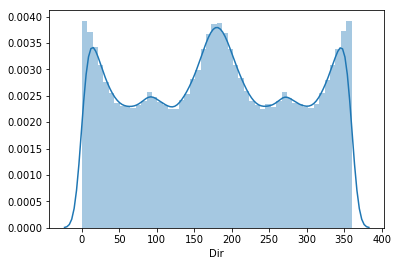

In [21]:
sns.distplot(train['Dir'].fillna(0))

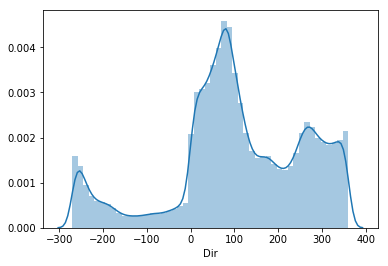

In [20]:
sns.distplot(train_reorient['Dir'])

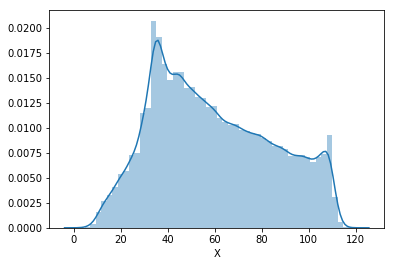

In [25]:
sns.distplot(train_reorient.loc[train_reorient.ToLeft, 'X'])

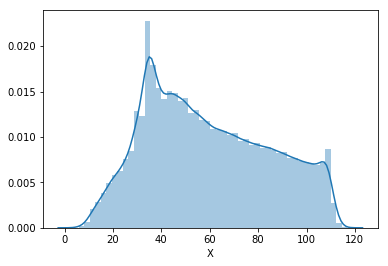

In [27]:
sns.distplot(train_reorient.loc[~train_reorient.ToLeft, 'X'])

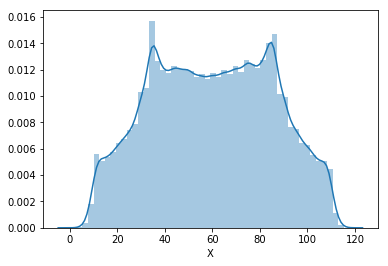

In [28]:
sns.distplot(train['X'])